# Project: Wrangling and Analyze Data

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
try:
    df_tw_arch = pd.read_csv("twitter-archive-enhanced.csv")
except:
    print("Read twitter archive failed")

In [3]:
df_tw_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Download tweet image
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv' , 'wb') as file:
    response = requests.get(url)
    file.write(response.content)

In [5]:
# print to check
df_image = pd.read_csv('image-predictions.tsv',   sep = '\t')

df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
tw_datas = []

# Read from json file
with open('tweet_json.txt', 'r') as f:
    for line in f:
        tw_data = json.loads(line)
        tw_datas.append({'tweet_id': tw_data['id_str'],
                        'retweet_count': tw_data['retweet_count'],
                        'favorite_count': tw_data['favorite_count']})

In [7]:
# Convert above list to the dataframe
df_tw_data = pd.DataFrame(tw_datas, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
df_tw_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**twitter-archive-enhanced.csv**

In [9]:
#.info returns a concise summary of the DataFrame
df_tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# .describe generates descriptive stats for the numerical data types in your DataFrame
df_tw_arch[['tweet_id','rating_numerator','rating_denominator']].describe()

,tweet_id,rating_numerator,rating_denominator
count,2.356000e+03,2356.000000,2356.000000
mean,7.427716e+17,13.126486,10.455433
std,6.856705e+16,45.876648,6.745237
min,6.660209e+17,0.000000,0.000000
25%,6.783989e+17,10.000000,10.000000
50%,7.196279e+17,11.000000,10.000000
75%,7.993373e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [11]:
#.samplereturns a random sample of records from the table in this case.
df_tw_arch.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None


In [12]:
# check duplicates
df_tw_arch[df_tw_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
# Check data null
df_tw_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# Check data null
df_tw_arch[df_tw_arch['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [15]:
# Value counts
df_tw_arch.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

**image-predictions.tsv**

In [16]:
df_image.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True


In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_image.duplicated().sum()

0

In [19]:
df_tw_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

**tweet_json.txt**

In [20]:
df_tw_data.sample()

,tweet_id,retweet_count,favorite_count
1227,713761197720473600,1541,5308


In [21]:
df_tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [22]:
df_tw_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
**Twitter archive**

1. Retweets and replies don't needed for my analysis

2. Wrong datatype of timestamp, and retweeted_status_timestamp

3. Some infomation related to retweets and replies need to drop because it's redundant for analysis

4. Some expanded_urls is null

5. Some rating wrong with float rating. example: 13.5 but in ratings just give 5

6. Wrong in name types. Name is a string

7. Have rating_numerator and rating_denominator but not having rating results columns. rating = rating_numerator/rating_denominator

**Image**

8. Dog state have lower case with start letters and contain '_'

9. df_tw_data need have tweet_id is int64



### Tidiness issues
1. Doggo, floofer, pupper, and puppo are dog classification. Need in a one column.

2. Need merge tw data and tw arch to one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_tw_arch_clean = df_tw_arch.copy()
df_image_clean = df_image.copy()
df_tw_data_clean = df_tw_data.copy()

### Issue #1: Remove datas releated retweets and replies

#### Define: retweets and replies don't needed for my analysis: drop retweets and replies

#### Code

In [24]:
# Keep data have retweeted_status_id is Null because that mean it not retweeted
df_tw_arch_clean = df_tw_arch_clean[df_tw_arch_clean['retweeted_status_id'].isnull()]

In [25]:
# Keep data have in_reply_to_status_id is Null because that mean it not retweeted
df_tw_arch_clean = df_tw_arch_clean[df_tw_arch_clean['in_reply_to_status_id'].isnull()]

#### Test

In [26]:
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Wrong datatype of timestamp, and retweeted_status_timestamp

#### Define:timestamp, and retweeted_status_timestamp should be datetime datatypes


#### Code

In [27]:
# Convert to datetime dtypes
df_tw_arch_clean.timestamp = pd.to_datetime(df_tw_arch_clean.timestamp)

In [28]:
# Convert to datetime dtypes
df_tw_arch_clean.retweeted_status_timestamp = pd.to_datetime(df_tw_arch_clean.retweeted_status_timestamp)

#### Test

In [29]:
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Issue #3: Some infomation related to retweets and replies need to drop because it's redundant for analysis

#### Define: drop columns that are related to retweets and replies because it's redundant for analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code

In [30]:
df_tw_arch_clean = df_tw_arch_clean.drop(['in_reply_to_status_id', 
                                          'in_reply_to_user_id', 
                                          'retweeted_status_id', 
                                          'retweeted_status_user_id', 
                                          'retweeted_status_timestamp'], axis = 1)

### Test

In [31]:
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issues #4: Some expanded_urls is null

### Define: Drop some expanded_urls is null

### Code


In [32]:
df_tw_arch_clean = df_tw_arch_clean.dropna()

### Test

In [33]:
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #5: Some rating wrong

### Define: Some rating is float and when convert to the rating_numerator missing. Example 13.5/10 will come 5/10. It's wrong

### Code

In [34]:
# Create list to store text, index and ratings float
ratings_float_text = []
ratings_float_text_index = []
ratings_float = []

# Regex
for i, text in df_tw_arch_clean['text'].items():
    if re.search('\d+\.\d+\/\d+', text):
        ratings_float_text.append(text)
        ratings_float_text_index.append(i)
        ratings_float.append(re.search('\d+\.\d+', text).group())

In [35]:
ratings_float_text_index

[45, 695, 763, 1712]

In [36]:
# Change wrong data to correct data
for i in range(len(ratings_float_text_index)):
    df_tw_arch_clean.loc[ratings_float_text_index[i], 'rating_numerator'] = float(ratings_float[i])

### Test

In [37]:
df_tw_arch_clean.loc[45]

tweet_id                                             883482846933004288
timestamp                                     2017-07-08 00:28:19+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 45, dtype: object

In [38]:
df_tw_arch_clean.loc[695]

tweet_id                                             786709082849828864
timestamp                                     2016-10-13 23:23:56+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Logan, the Chow who lived. He solemnly...
expanded_urls         https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                   9.75
rating_denominator                                                   10
name                                                              Logan
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 695, dtype: object

### Issue #6: Wrong in name types

### Define: Name should be string dtype

### Code

In [39]:
df_tw_arch_clean['name'] = df_tw_arch_clean['name'].astype('string')

### Test

In [40]:
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   string             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Issue 7: Have rating_numerator and rating_denominator but not having rating results columns. rating = rating_numerator/rating_denominator

### Define: Add a colums is rating, and caculate rating = rating_numerator/rating_denominator

### Code

In [41]:
df_tw_arch_clean['rating'] = df_tw_arch_clean['rating_numerator'] / df_tw_arch_clean['rating_denominator']

### Test

In [42]:
df_tw_arch_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,1.2


### Issue #8: Dog state have lower case with start letters and contain '_'

### Define: Dog state should start with upper case and remove '_'

### Code

In [43]:
# Upper case for p1, p2, p3
df_image_clean.p1.str.capitalize()
df_image_clean.p2.str.capitalize()
df_image_clean.p3.str.capitalize()

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        Bloodhound
3                Miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2075, dtype: object

In [44]:
# Remove '_' in p1, p2 and p3
df_image_clean['p1'].replace(regex=True,inplace=True,to_replace="_",value=' ')
df_image_clean['p2'].replace(regex=True,inplace=True,to_replace="_",value=' ')
df_image_clean['p3'].replace(regex=True,inplace=True,to_replace="_",value=' ')

### Test

In [45]:
df_image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9: df_tw_data need have tweet_id is int64

### Define: df_tw_data need have tweet_id is int64

### Code

In [46]:
df_tw_data['tweet_id'] = df_tw_data['tweet_id'].astype('int64')

### Test

In [47]:
df_tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Tidiness issues

### Doggo, floofer, pupper, and puppo are dog classification. Need in a one column.

### Code

In [48]:
# Merge doggo, floofer, pupper, puppo to the dog breed using melt
df_tw_arch_clean = pd.melt(df_tw_arch_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'rating'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

In [49]:
# Drop 'type'
df_tw_arch_clean = df_tw_arch_clean.drop(['type'], axis=1)

# #drop duplicates datas
df_tw_arch_clean = df_tw_arch_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

### Test

In [50]:
df_tw_arch_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
2017,667435689202614272,2015-11-19 20:14:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10,None,1.2,None
2016,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10,None,1.0,None
2015,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,None,0.6,None
2014,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,1.1,None
2013,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10,Reese,0.7,None


In [51]:
df_tw_arch_clean.dog_stage.value_counts()

None       1759
pupper      229
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [52]:
df_tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2017 to 6393
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   string             
 8   rating              2094 non-null   float64            
 9   dog_stage           2094 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(4), string(1)
memory usage: 180.0+ KB


### Need merge tw data and tw arch to one

### Code

In [53]:
df_tw_data_totals = df_tw_arch_clean.merge(df_image, on='tweet_id').merge(df_tw_data,on='tweet_id')

### Test

In [54]:
df_tw_data_totals.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667435689202614272,2015-11-19 20:14:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10,None,1.2,None,...,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,89,326
1,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10,None,1.0,None,...,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,257,483
2,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,None,0.6,None,...,0.980815,False,drake,0.006918,False,hen,0.005255,False,620,833
3,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,1.1,None,...,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,96,327
4,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10,Reese,0.7,None,...,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,66,203


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
df_tw_data_totals.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
# Copy data
df_tw_visual = df_tw_data_totals.copy()

### Find the most of stage

In [57]:
df_tw_dog_stage = df_tw_visual[df_tw_visual['dog_stage'] != 'None']

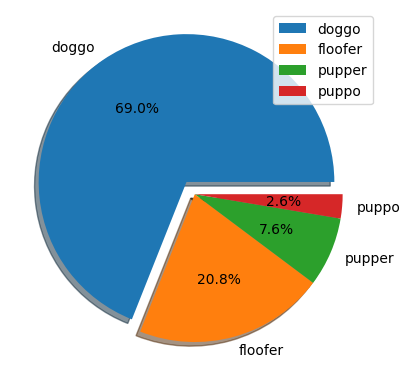

In [58]:
# Draw a pie chart to visuallizing the most of stage
stage_labels = ['doggo', 'floofer', 'pupper', 'puppo']
stage_values = df_tw_dog_stage.dog_stage.value_counts()
stage_explode = [0.1, 0, 0, 0]

plt.pie(stage_values, labels = stage_labels, explode = stage_explode, autopct='%1.1f%%', shadow = True)
plt.legend()

plt.show() 

### Visualizing Rating count by time

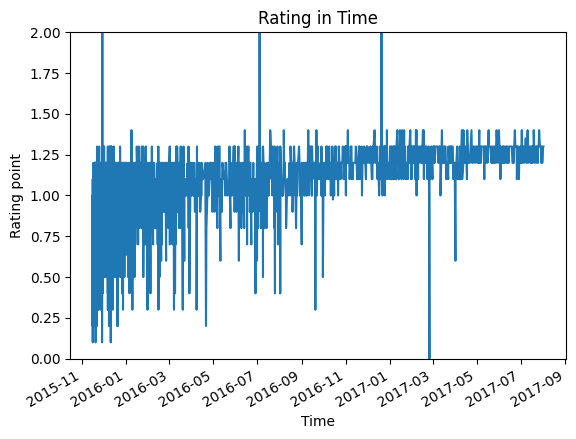

In [59]:
# Plot standardized ratings over time with ylim of 0-2
df_tw_visual.groupby('timestamp')['rating'].mean().plot(kind='line', title = 'Rating in Time')
plt.ylim(0, 2)
plt.xlabel('Time')
plt.ylabel('Rating point')
plt.show()

### Visualizing the most Rating point

In [60]:
df_tw_visual.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667435689202614272,2015-11-19 20:14:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10,None,1.2,None,...,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,89,326
1,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10,None,1.0,None,...,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,257,483
2,667443425659232256,2015-11-19 20:44:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,None,0.6,None,...,0.980815,False,drake,0.006918,False,hen,0.005255,False,620,833
3,667453023279554560,2015-11-19 21:22:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,1.1,None,...,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,96,327
4,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10,Reese,0.7,None,...,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,66,203


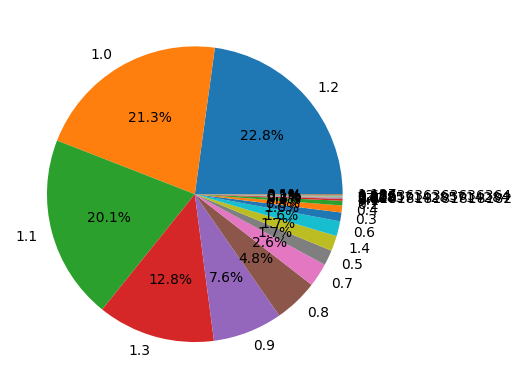

In [61]:
# Draw a pie chart to visuallizing the most of stage
rating_labels = list(df_tw_visual.rating.value_counts().keys())
rating_values = df_tw_visual.rating.value_counts()

plt.pie(rating_values, labels = rating_labels, autopct='%1.1f%%', shadow = False)

plt.show() 

### Insights:
1. Doggo is the most of dog state with 69%, followed by floofer with 10.6%. And the lowest is puppo with just 2.6%

2. After 01/2017, the ratio of rating more than 1.0 increasing more than time before.

3. The most of rating point is 1.2 with 22.8%, and second is 1.0 with 21.3%. We can see that more than 60% rating in the range[1.0-1.2]